# ANALYSING US FATAL POLICE SHOOTINGS FROM 2015-2020

This dataset is taken from The Washington Post's [Github repository](https://github.com/washingtonpost/data-police-shootings). It contains data related to every fatal shooting of a civilian by a police officer in the States in the line of duty. The time duration is from the start of the year 2015 to 2020. The Post decided to collect data regarding these shootings after the unfortunate death of Micheal Brown. Sources of this data are news accounts, social media posts and police reports.

To refer to their own analysis of this dataset, go to [this link](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/)

I will be performing an Exploratory Data Analysis on this dataset.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usps20/2017.csv
/kaggle/input/usps20/usps.csv
/kaggle/input/usps20/2016.csv
/kaggle/input/usps20/2015.csv
/kaggle/input/usps20/2018.csv


**DATA WRANGLING AND CLEANING:**

In [3]:
usps=pd.read_csv('/kaggle/input/usps20/usps.csv')
usps.drop(['id','city'],axis=1,inplace=True)

In [4]:
usps.head()

,name,date,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [5]:
usps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5716 entries, 0 to 5715
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     5499 non-null   object 
 1   date                     5716 non-null   object 
 2   manner_of_death          5716 non-null   object 
 3   armed                    5503 non-null   object 
 4   age                      5456 non-null   float64
 5   gender                   5715 non-null   object 
 6   race                     5109 non-null   object 
 7   state                    5716 non-null   object 
 8   signs_of_mental_illness  5716 non-null   bool   
 9   threat_level             5716 non-null   object 
 10  flee                     5426 non-null   object 
 11  body_camera              5716 non-null   bool   
 12  longitude                5437 non-null   float64
 13  latitude                 5437 non-null   float64
 14  is_geocoding_exact      

The dataset contains 16 columns out of which 3 are numerical, 3 are of boolean type and the rest are of type Object.

Brief description about the columns in this dataset:
1. Name- name of the deceased
2. date- date of the casualty
3. manner_of_death- was the victim only shot or shot and tasered.
4. armed- indicates whether the victim was having any object which could cause harm
5. age- age of the deceased
6. gender- sex of the victim
7. race- race of the victim, if specified. Contains 5 categories, Asian(A),White(W),Black(B),Hispanic(H),Others(O),Not Specified(N)
8. city- city where the casualty took place
9. state- self explanatory
10. signs_of_mental_illness- did the victim have mental health issues
11. threat_level- level of threat the officers felt they were up against.
12. flee- did the victim attempt to flee?
13. body_camera- did the officers have a body cam switched on?
14. longitude- longitude of the location of incident
15. latitude- latitude of the location of the incident
16. is_geocoding_exact- accuracy of the coordinates

In [6]:
#no. of data points in dataset, contains 5716 rows and 16 columns
usps.shape

(5716, 15)

In [7]:
#handling null values in age column
mean=usps.age.mean()
mean=round(mean)
mean

37

In [ ]:
#renaming mental illness column in dataset


In [8]:
#replacing null values in age column with mean age value
usps['age']=usps['age'].fillna(37)

In [9]:
usps['gender']=usps['gender'].fillna('M')

In [10]:
#dropping all rows where race is not specified to avoid making biased conclusions
usps=usps[usps['race'].isna()==False]
usps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5711
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     5074 non-null   object 
 1   date                     5109 non-null   object 
 2   manner_of_death          5109 non-null   object 
 3   armed                    4906 non-null   object 
 4   age                      5109 non-null   float64
 5   gender                   5109 non-null   object 
 6   race                     5109 non-null   object 
 7   state                    5109 non-null   object 
 8   signs_of_mental_illness  5109 non-null   bool   
 9   threat_level             5109 non-null   object 
 10  flee                     4874 non-null   object 
 11  body_camera              5109 non-null   bool   
 12  longitude                4886 non-null   float64
 13  latitude                 4886 non-null   float64
 14  is_geocoding_exact      

**NOTE:** One could observe that there are significant number of null values in some columns of the dataset, but since the analysis I am doing is based on a sensitive topic, it would be a mistake to try to estimate the missing values of any of the columns above. Therefore I have chosen to get along with the analysis.

In [11]:
#filling nan values in flee column
usps['flee'].fillna('NotSpecified',inplace=True)

Splitting the "Date" column:

In [12]:
#splitting date into 3 columns year month and day
usps['year']=pd.DatetimeIndex(usps['date']).year
usps['month']=pd.DatetimeIndex(usps['date']).strftime('%b')
usps['day']=pd.DatetimeIndex(usps['date']).strftime('%A')
usps.drop(['date'],axis=1,inplace=True)

In [13]:
usps.head()

,name,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day
0,Tim Elliot,shot,gun,53.0,M,A,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,Jan,Friday
1,Lewis Lee Lembke,shot,gun,47.0,M,W,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,Jan,Friday
2,John Paul Quintero,shot and Tasered,unarmed,23.0,M,H,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,Jan,Saturday
3,Matthew Hoffman,shot,toy weapon,32.0,M,W,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,Jan,Sunday
4,Michael Rodriguez,shot,nail gun,39.0,M,H,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,Jan,Sunday


In [14]:
sns.set_style('darkgrid')

**The dataset is now ready for analysis**

**DATA ANALYSIS AND VISUALISATION**

FATALITIES REPORTED ACROSS STATES

In [15]:
usps.groupby(['state']).state.count().sort_values(ascending=False)

state
CA    733
TX    450
FL    345
AZ    226
CO    181
GA    172
OK    156
NC    156
OH    150
WA    133
TN    130
MO    126
LA    109
IL    103
PA     99
NM     97
AL     95
NY     94
IN     94
KY     93
VA     93
WI     92
NV     90
SC     83
MD     78
OR     77
MI     77
AR     73
UT     67
MN     63
MS     62
NJ     62
KS     50
WV     46
ID     38
AK     36
IA     34
MA     33
MT     31
HI     29
NE     25
ME     21
CT     20
DC     14
SD     14
WY     13
ND     12
NH     12
DE     10
VT      8
RI      4
Name: state, dtype: int64

We observe that California has the highest number of fatal shootings followed by Texas, Florida and Arizona.

In [17]:
usps.head()

,name,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day
0,Tim Elliot,shot,gun,53.0,M,A,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,Jan,Friday
1,Lewis Lee Lembke,shot,gun,47.0,M,W,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,Jan,Friday
2,John Paul Quintero,shot and Tasered,unarmed,23.0,M,H,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,Jan,Saturday
3,Matthew Hoffman,shot,toy weapon,32.0,M,W,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,Jan,Sunday
4,Michael Rodriguez,shot,nail gun,39.0,M,H,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,Jan,Sunday


IDENTIFYING UNIQUE VALUES OF RELEVANT COLUMNS IN THE DATASET

In [18]:
li=['manner_of_death','armed','gender','race','state','flee','threat_level','signs_of_mental_illness']
for col in li:
    print(col)
    print(usps[col].unique())

manner_of_death
['shot' 'shot and Tasered']
armed
['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' nan 'shovel' 'vehicle'
 'hammer' 'hatchet' 'sword' 'machete' 'box cutter' 'undetermined'
 'metal object' 'screwdriver' 'lawn mower blade' 'flagpole'
 'guns and explosives' 'cordless drill' 'metal pole' 'Taser' 'metal pipe'
 'metal hand tool' 'blunt object' 'metal stick' 'sharp object'
 'meat cleaver' 'carjack' 'chain' "contractor's level" 'unknown weapon'
 'stapler' 'crossbow' 'bean-bag gun' 'baseball bat and fireplace poker'
 'straight edge razor' 'gun and knife' 'ax' 'brick' 'baseball bat'
 'hand torch' 'chain saw' 'garden tool' 'scissors' 'pole' 'pick-axe'
 'flashlight' 'spear' 'chair' 'pitchfork' 'hatchet and gun' 'rock'
 'piece of wood' 'bayonet' 'pipe' 'glass shard' 'motorcycle'
 'pepper spray' 'metal rake' 'baton' 'crowbar' 'oar' 'machete and gun'
 'air conditioner' 'pole and knife' 'beer bottle'
 'baseball bat and bottle' 'fireworks' 'pen' 'chainsaw' 'gun and sword'
 'gun and car'

**DISTRIBUTION OF FATALITIES BY AGE**

(array([   7.,  585., 1446., 1289.,  854.,  506.,  305.,   83.,   26.,
           8.]),
 array([ 6. , 14.5, 23. , 31.5, 40. , 48.5, 57. , 65.5, 74. , 82.5, 91. ]),
 <a list of 10 Patch objects>)

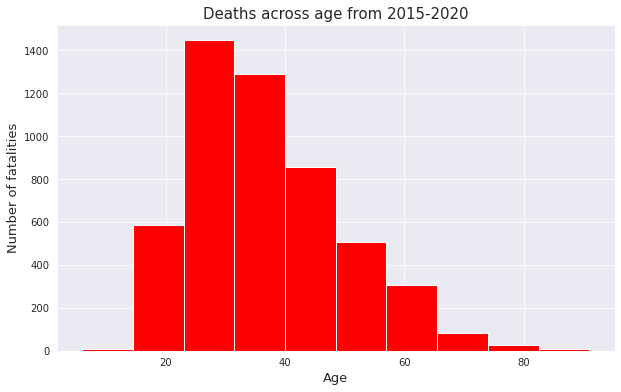

In [19]:
plt.figure(figsize=(10,6))
plt.title('Deaths across age from 2015-2020',size=15)
plt.xlabel('Age',size=13)
plt.ylabel('Number of fatalities',size=13)
plt.hist(usps['age'],color='red')

We observe that the number of deaths progressively decrease as the ages increase.Ages between 20-40 consitute over 50% of all reported casualties.Highest recorded number of deaths occur in the age group of 20 to ~30 upto 40. Lowest number is observed for ages over 60 and below 15.

**What is the maximum and minimum age of victims?**

In [20]:
usps['age'].describe()

count    5109.000000
mean       36.582306
std        12.647908
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

Youngest casualty was 6 years old and eldest was 91 years old. This is very unfortunate because people of these age groups are highly unlikely to be even involced in committing harm to anyone which points to on duty mistakes made by the police authorities. 

FATALITIES OVER THE YEARS

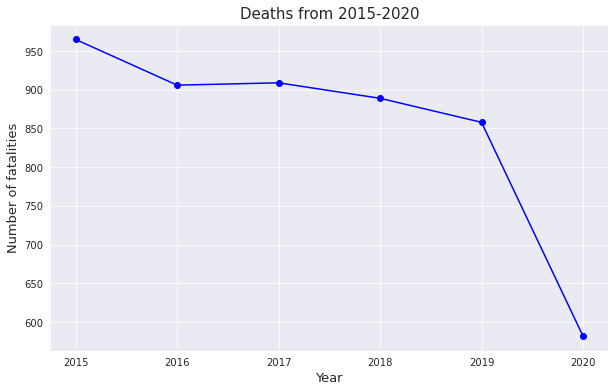

In [21]:
years=usps.groupby(['year']).year.count()
plt.figure(figsize=(10,6))
plt.title('Deaths from 2015-2020',size=15)
plt.xlabel('Year',size=13)
plt.ylabel('Number of fatalities',size=13)
plt.plot(years,color='blue',marker='o')

We observe that the number of civilian casualties per year has remained almost the same. Inspite of the citizen's outrage against these casualties,not much change has taken place. Harming civilians in any way is not viable.

CASUALTIES REPORTED IN EACH MONTH

In [22]:
months_df=pd.DataFrame({'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],'count':[509,467,505,433,419,427,445,441,372,390,354,347]})

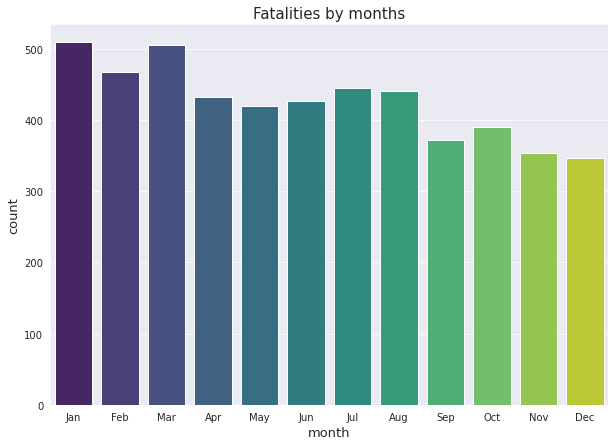

In [23]:
plt.figure(figsize=(10,7))
plt.title('Fatalities by months',size=15)
plt.xlabel('Month',size=13)
plt.ylabel('Number of fatalities',size=13)
sns.barplot(x='month',y='count',data=months_df,palette='viridis')

January had maximum number of casualties and December had the least number reported.

CASUALTIES REPORTED ON DAYS OF WEEK

In [24]:
days_df=pd.DataFrame({'Day':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],'count':[703,773,779,774,708,682,690]})

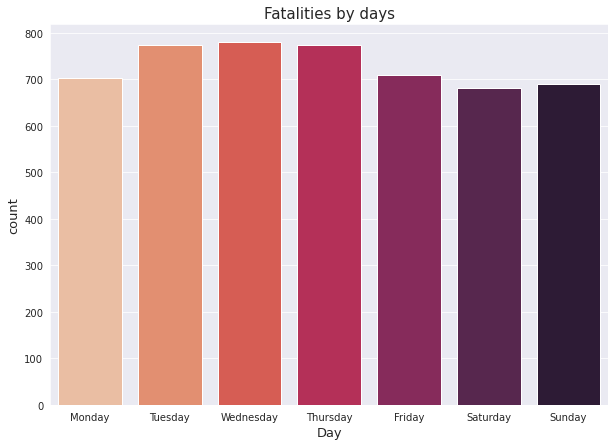

In [25]:
plt.figure(figsize=(10,7))
plt.title('Fatalities by days',size=15)
plt.xlabel('Day',size=13)
plt.ylabel('Number reported',size=13)
sns.barplot(x='Day',y='count',data=days_df,palette='rocket_r')

Maximum number of fatalities were reported on Tuesday,Wednesday and Thursday. Saturday has the lowest count.

GENDERWISE DISTRIBUTION OF FATALITIES

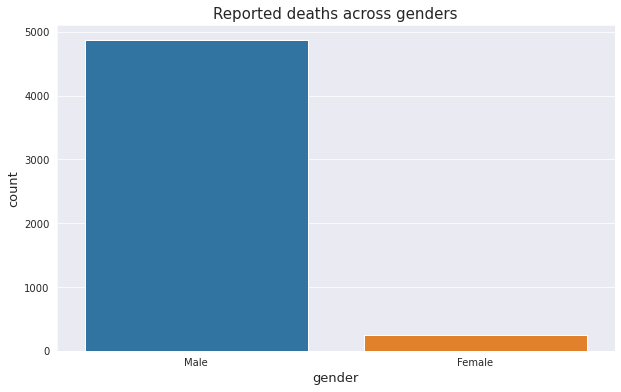

In [26]:
gender_df=pd.DataFrame({'gender':['Male','Female'],'count':[4869,240]})
plt.figure(figsize=(10,6))
plt.xlabel('gender',size=13)
plt.ylabel('fatalities',size=13)
plt.title('Reported deaths across genders',size=15)
sns.barplot(x='gender',y='count',data=gender_df)

Although there is no sense of equality here, it is observed that almost 95% of all civilian victims were Male.

(array([ 8., 45., 52., 49., 31., 35., 14.,  2.,  3.,  1.]),
 array([12. , 19.2, 26.4, 33.6, 40.8, 48. , 55.2, 62.4, 69.6, 76.8, 84. ]),
 <a list of 10 Patch objects>)

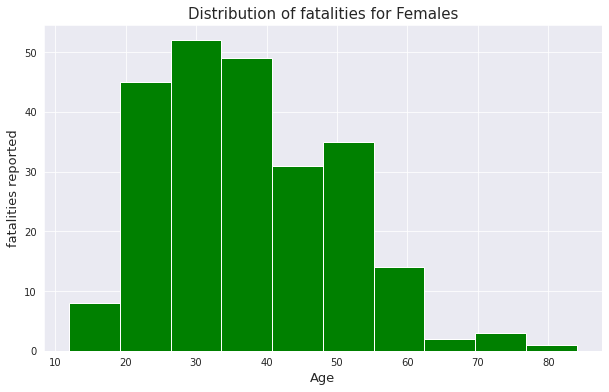

In [27]:
#distribution of fatalities among Females
female_df=usps.loc[usps['gender']=='F',:]
plt.figure(figsize=(10,6))
plt.xlabel('Age',size=13)
plt.ylabel('fatalities reported',size=13)
plt.title('Distribution of fatalities for Females',size=15)
plt.hist(female_df['age'],color='green')

It is observed that the age group 25-40 has recorded the most fatalities for females. Lowest count is for Ages above 60. Shockingly we see a significant number in the age group 10-20. Killing potentially harmless civilians is not defendable even if this happens in the line of duty.

The distribution for males is not plotted. Since males constitute over 95% of total victims, we expect its distribution to be the same as that for overall distribution of casualties.

ANALYSING THE STATUS OF BODY CAMERAS

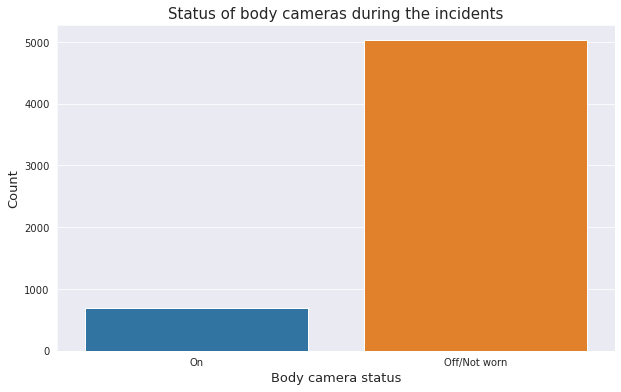

In [28]:
body_cam=pd.DataFrame({'Body camera status':['On','Off/Not worn'],'Count':[687,5029]})
plt.figure(figsize=(10,6))
plt.xlabel('Body camera on?',size=13)
plt.ylabel('Count',size=13)
plt.title('Status of body cameras during the incidents',size=15)
sns.barplot(x='Body camera status',y='Count',data=body_cam)

As observed, in almost 90% of total reported fatal shootings, the body cameras were either not worn or turned off during the incident. This may raise nothing but suspicions. Reasons for unavailability of cameras could be that the department was not provided with them or the officers on duty refused to acknowledge their need. 

Whatever be the reasons, the body cameras not only render the police forces accountable for their actions, but also provide them recorded evidence in case the perpetrator misbehaves. It can be used to promote officer safety, ensure strict law enforcement and prevention of crimes. Moreover the recorded footage speeds up investigations too. Usage of such cameras limit the officers to execute legitimate actions and also make the citizens comply with their commands, thus ensuring quicker resolutions of situations.

This technology is of help to both the citizens and the police forces. Rarely would we have observed such fatalities being reported if the body cameras had been used, which is proven by the low count of fatalities when the cameras were present.


**ANALYSING THREAT_LEVEL of VICTIMS**

Were all victims equally harmful?

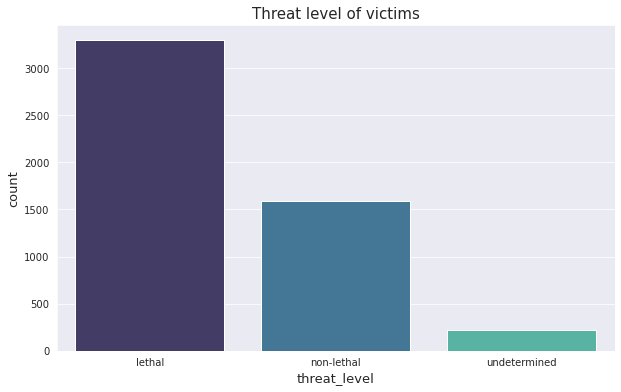

In [29]:
threat=usps.groupby(['threat_level']).threat_level.count()
threat_df=pd.DataFrame(data={'threat_level':['lethal','non-lethal','undetermined'],'count':[3295,1593,221]})
plt.figure(figsize=(10,6))
plt.title('Threat level of victims',size=15)
plt.xlabel('level reported',size=13)
plt.ylabel('Number of fatalities',size=13)
sns.barplot(data=threat_df,x='threat_level',y='count',palette='mako')

We find that more than 3000 civilians who were killed were reported to be lethal, whereas over 1500 were documented as non_lethal, yet were killed. Self-defense can be viable when someone attacks you but to fatally shoot someone who's harmless is not in accordance with the laws.

**FATALITIES REPORTED ACROSS VARIOUS RACES**

Comparison of casualties reported per year per race

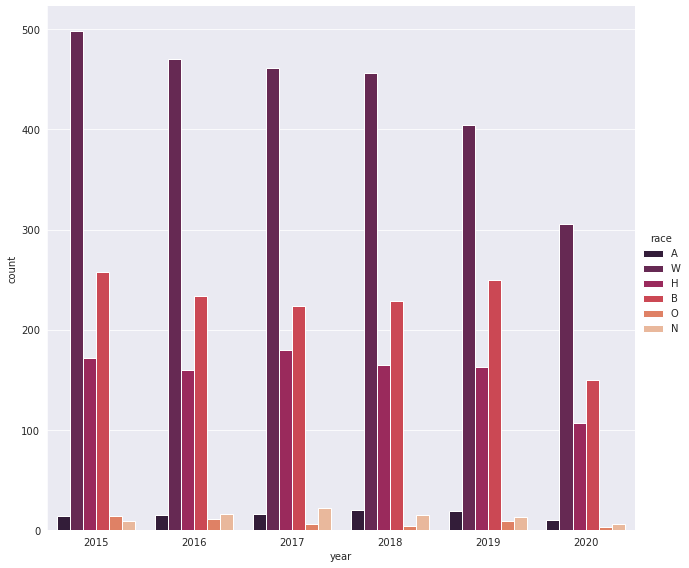

In [30]:
sns.catplot(x="year", hue="race", kind="count",palette="rocket",height=8, aspect=1.1,
            data=usps)

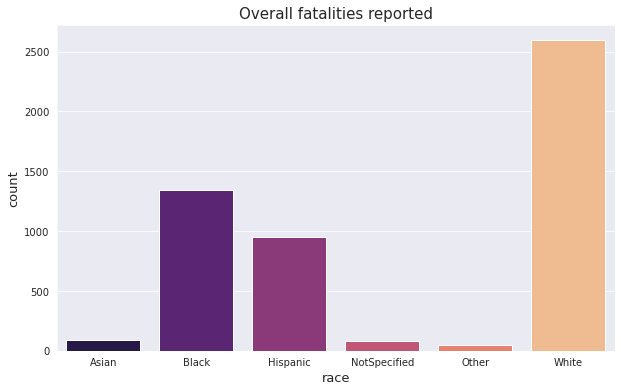

In [31]:
race=usps.groupby(['race']).race.count()
race_df=pd.DataFrame(data={'race':['Asian','Black','Hispanic','NotSpecified','Other','White'],'count':[94,1345,947,81,47,2595]})
plt.figure(figsize=(10,6))
plt.title('Overall fatalities reported',size=15)
plt.xlabel('race',size=13)
plt.ylabel('Number of fatalities',size=13)
sns.barplot(data=race_df,x='race',y='count',palette='magma')

We observe that out of the 5109 reported shootings, majority of the victims were whites, which does not indicate any sort of racial bias. With the coming of new unfortunate controversial killings like that of George Floyd, racism has been a prevailing serious issue in America. A more accurate judgement on racial bias in these shootings can be made by comparing how many innocent and unarmed people were killed among these races.

#mental health
#who fleed and who did not
variation of weapons
manner of death
race
test for racial bias
plot locations


MENTAL HEALTH OF VICTIMS

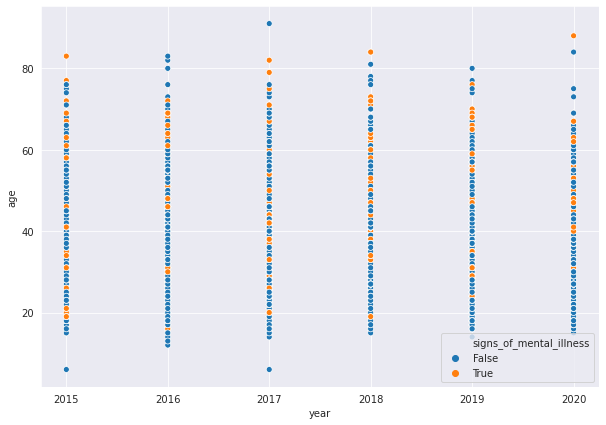

In [43]:
plt.figure(figsize=(10,7))
plt.xlabel('year')
plt.ylabel('age')
sns.scatterplot(x=usps['year'], y=usps['age'], hue=usps['signs_of_mental_illness'])

In [46]:
usps.groupby(['signs_of_mental_illness']).signs_of_mental_illness.count()

signs_of_mental_illness
False    3917
True     1192
Name: signs_of_mental_illness, dtype: int64

#unarmed in races, #mentally ill victims, # not flee and unarmed, #unarmed and mentally ill, #locations where shootings took place, #unarmed and killed among races